### Assignment 1 CAP 6673
Use telescope_data.csv for this assignment. The dataset has 10 real attributes, and the last one is simply the class label, which is categorical, and which you will ignore for this assignment. Assume that attributes are numbered starting from 1.



---

*Matthew Acs*

### Part 0. Import Data and Setup Notebook

In [1]:
## Import packages and read data into a pandas data frame

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('telescope_data.csv')
df = df.drop(columns = 'class')
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [2]:
## Store the number of data points in n

n = df.count()[1]
print(n)

201


In [3]:
## Convert the data frame to a numpy array

np_array = df.to_numpy()
print(np_array)

[[ 28.7967  16.0021   2.6449 ...  -8.2027  40.092   81.8828]
 [ 31.6036  11.7235   2.5185 ...  -9.9574   6.3609 205.261 ]
 [162.052  136.031    4.0612 ... -45.216   76.96   256.788 ]
 ...
 [ 31.6082  10.4765   2.6699 ...   4.7111  56.6679  39.2281]
 [161.4795  83.0297   3.0887 ... -49.9263  86.6275 311.6682]
 [134.979  111.427    3.4087 ... -69.4388  88.2932 282.304 ]]


---

### Part 1.	Compute the multivariate mean vector.


In [4]:
## Computes and prints the multivariate mean vector using np.mean

mean_vector = np.mean(np_array, axis=0)
print(mean_vector)

[ 57.67503035  24.01521443   2.87363881   0.36339005   0.20743433
  -3.22176468  13.13659005   1.79170249  31.52651841 197.80452736]


---

### Part 2.	Compute the sample covariance matrix as inner products between the columns of the centered data matrix.


In [5]:
## Uses the inner product to compute the covariance matrix

centered = np_array - 1 * mean_vector.T

inner_product_cov = np.dot(centered.T, centered)/n
print(inner_product_cov)

[[ 1.75792100e+03  7.27640008e+02  1.38087177e+01 -4.77211532e+00
  -2.74060681e+00 -3.36837774e+02 -3.15514099e+02  1.33529557e+02
  -4.24870798e+01  1.08309128e+03]
 [ 7.27640008e+02  5.08766975e+02  6.99650584e+00 -2.21973637e+00
  -1.28605561e+00  2.53535035e+02 -4.17108575e+02  7.60406393e+01
   3.44995281e+01  4.54173202e+02]
 [ 1.38087177e+01  6.99650584e+00  2.25145465e-01 -6.71578416e-02
  -3.85953367e-02  4.58446913e-01  1.60093687e+00  6.45465916e-01
  -2.83222706e+00  1.73141135e+01]
 [-4.77211532e+00 -2.21973637e+00 -6.71578416e-02  2.93358253e-02
   1.77858680e-02  3.27552128e-01 -8.79961283e-01 -3.91955634e-01
   1.31323325e+00 -4.59278076e+00]
 [-2.74060681e+00 -1.28605561e+00 -3.85953367e-02  1.77858680e-02
   1.14042734e-02  1.53677996e-01 -6.02812907e-01 -2.08916836e-01
   7.07216450e-01 -2.51123051e+00]
 [-3.36837774e+02  2.53535035e+02  4.58446913e-01  3.27552128e-01
   1.53677996e-01  3.88043649e+03 -2.62285821e+02  1.54192932e+01
   1.01202203e+01 -6.56690098e+02

---

### Part 3.	Compute the sample covariance matrix as outer product between the centered data points.


In [6]:
## Uses the outer product to compute the covariance matrix

centered = np_array - 1 * mean_vector.T

outer_product_cov = np.zeros((np_array.shape[1], np_array.shape[1]))

for row in centered:
  outer_product_cov += np.outer(row,row)
outer_product_cov = outer_product_cov/n

print(outer_product_cov)

[[ 1.75792100e+03  7.27640008e+02  1.38087177e+01 -4.77211532e+00
  -2.74060681e+00 -3.36837774e+02 -3.15514099e+02  1.33529557e+02
  -4.24870798e+01  1.08309128e+03]
 [ 7.27640008e+02  5.08766975e+02  6.99650584e+00 -2.21973637e+00
  -1.28605561e+00  2.53535035e+02 -4.17108575e+02  7.60406393e+01
   3.44995281e+01  4.54173202e+02]
 [ 1.38087177e+01  6.99650584e+00  2.25145465e-01 -6.71578416e-02
  -3.85953367e-02  4.58446913e-01  1.60093687e+00  6.45465916e-01
  -2.83222706e+00  1.73141135e+01]
 [-4.77211532e+00 -2.21973637e+00 -6.71578416e-02  2.93358253e-02
   1.77858680e-02  3.27552128e-01 -8.79961283e-01 -3.91955634e-01
   1.31323325e+00 -4.59278076e+00]
 [-2.74060681e+00 -1.28605561e+00 -3.85953367e-02  1.77858680e-02
   1.14042734e-02  1.53677996e-01 -6.02812907e-01 -2.08916836e-01
   7.07216450e-01 -2.51123051e+00]
 [-3.36837774e+02  2.53535035e+02  4.58446913e-01  3.27552128e-01
   1.53677996e-01  3.88043649e+03 -2.62285821e+02  1.54192932e+01
   1.01202203e+01 -6.56690098e+02

---

### Part 4.	Compute the correlation between Attributes 1 and 2 by computing the cosine of the angle between the centered attribute vectors. Plot the scatter plot between these two attributes.


In [7]:
## Computes the correlation between attributes 1 and 2 using the
## cosine of the angle between the centered attribute vectors

attribute_1_centered = np_array[ :, 0] - 1 * np.mean(np_array[ :, 0])
attribute_2_centered = np_array[ :, 1]- 1 * np.mean(np_array[ :, 1])

cos_theta = np.dot( (attribute_1_centered / math.sqrt(np.dot(attribute_1_centered.T, attribute_1_centered))).T, (attribute_2_centered / math.sqrt(np.dot(attribute_2_centered.T, attribute_2_centered))) )
print("Correlation: ")
print(cos_theta)

Correlation: 
0.7694093096665072


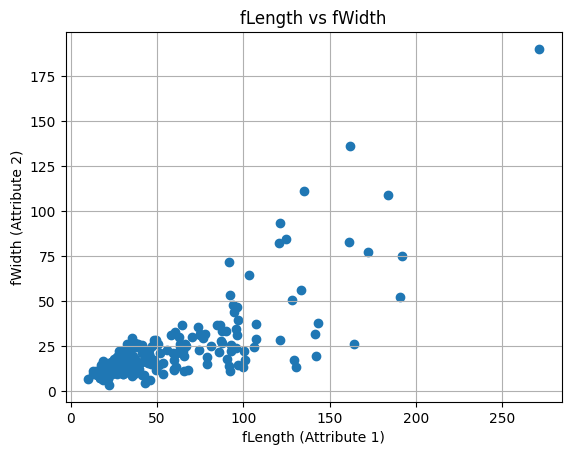

In [8]:
## Plots the scatter plot between attribute 1 and 2

plt.scatter(np_array[ :, 0], np_array[ :, 1])
plt.xlabel('fLength (Attribute 1)')
plt.ylabel('fWidth (Attribute 2)')
plt.title('fLength vs fWidth')
plt.grid()
plt.show()

---

### Part 5.	Assuming that Attribute 1 is normally distributed, plot its probability density function.


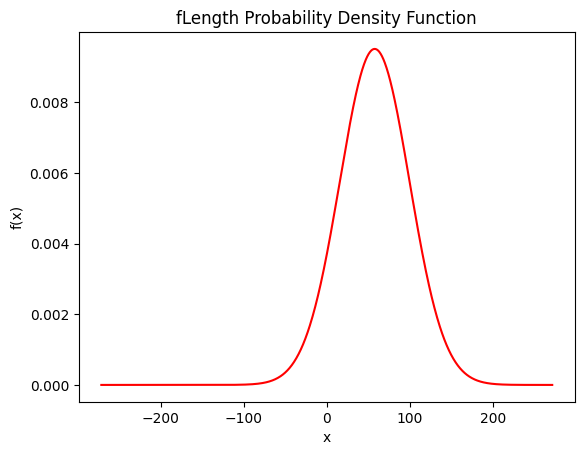

In [9]:
## Plots the PDF of attribute 1, assuming it is normally distributed

x = np.linspace(-1 * max(np_array[ :, 0]), max(np_array[ :, 0]), 1000)
y = []

mean = mean_vector[0]
variance = outer_product_cov[0][0]

def f(x):
  return (1 / (np.sqrt(2 * math.pi * variance))) * math.exp(-1 * ((((x1 - mean))**2) / (2 * variance)))

for x1 in x:
  y.append(f(x1))

plt.plot(x, y, color='red')
plt.title('fLength Probability Density Function')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

---

### Part 6.	Plot Empirical CDFs of Attributes, 2, 5, and 7.


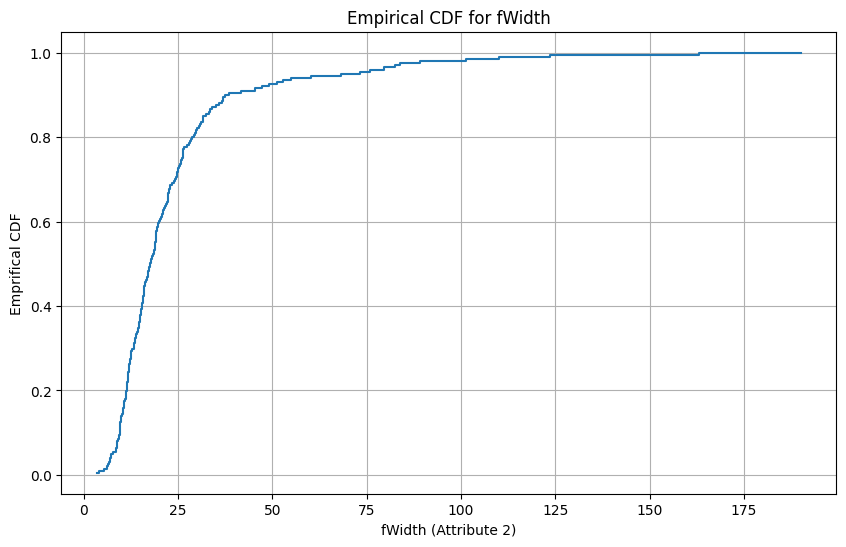

In [10]:
## Plots the CDF of attribute 2

attribute_2 = df['fWidth']

unique_lengths, counts = np.unique(attribute_2, return_counts=True)
CDF = np.cumsum(counts) / len(attribute_2)

plt.figure(figsize=(10, 6))
plt.step(unique_lengths, CDF, where='mid')
plt.xlabel('fWidth (Attribute 2)')
plt.ylabel('Emprifical CDF')
plt.title('Empirical CDF for fWidth')
plt.grid(True)
plt.show()

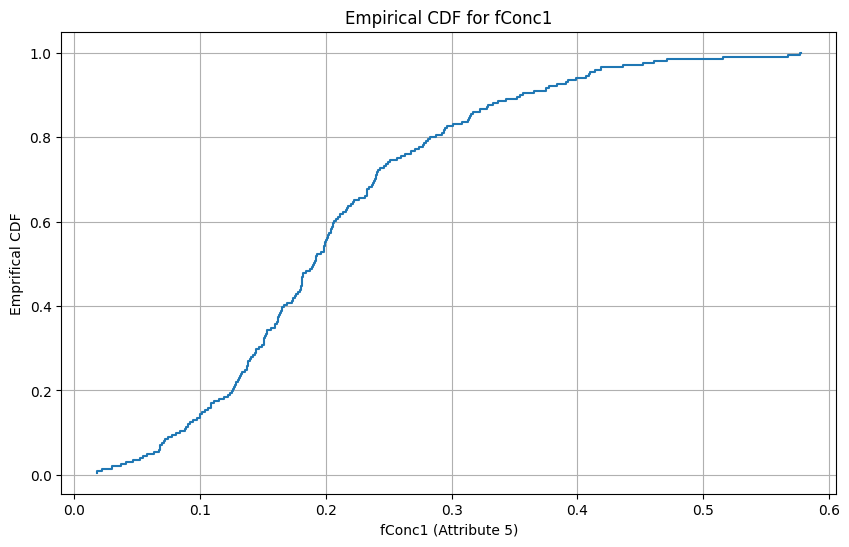

In [11]:
## Plots the CDF of attribute 5

attribute_5 = df['fConc1']

unique_lengths, counts = np.unique(attribute_5, return_counts=True)
CDF = np.cumsum(counts) / len(attribute_5)

plt.figure(figsize=(10, 6))
plt.step(unique_lengths, CDF, where='mid')
plt.xlabel('fConc1 (Attribute 5)')
plt.ylabel('Emprifical CDF')
plt.title('Empirical CDF for fConc1')
plt.grid(True)
plt.show()

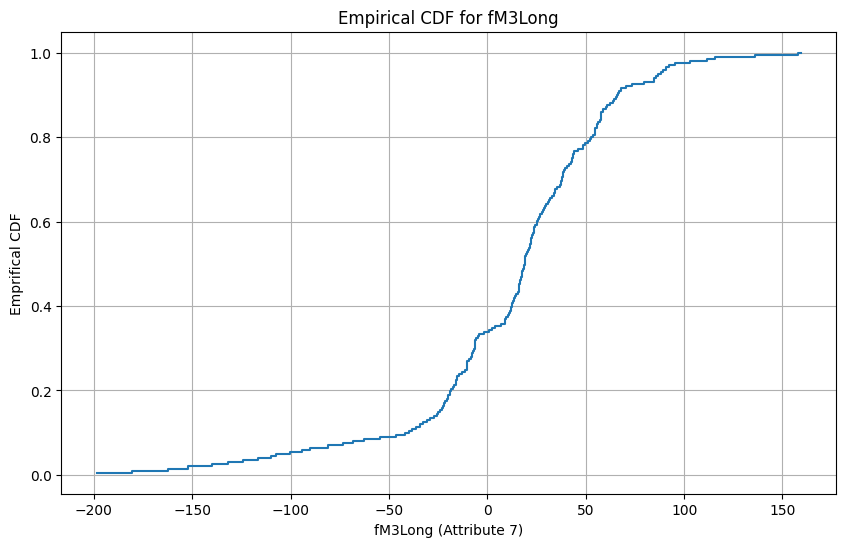

In [12]:
## Plots the CDF of attribute 7

attribute_7 = df['fM3Long']

unique_lengths, counts = np.unique(attribute_7, return_counts=True)
CDF = np.cumsum(counts) / len(attribute_7)

plt.figure(figsize=(10, 6))
plt.step(unique_lengths, CDF, where='mid')
plt.xlabel('fM3Long (Attribute 7)')
plt.ylabel('Emprifical CDF')
plt.title('Empirical CDF for fM3Long')
plt.grid(True)
plt.show()

---

### Part 7.	Which attribute has the largest variance, and which attribute has the smallest variance? Print these values.


In [13]:
## Finds the attribute with the largest variance and smallest variance

variance = []
for i in range (10):
  variance.append(inner_product_cov[i][i])

print(variance)
print("")

print("Attribute " + str(int(np.argmax(variance) + 1)) + " has the largest variance")
print("Variance: " + str(np.max(variance)))

print ("")


print("Attribute " + str(int(np.argmin(variance) + 1)) + " has the smallest variance")
print("Variance: " + str(np.min(variance)))

[1757.9209980704727, 508.76697473526445, 0.2251454651607633, 0.029335825274126887, 0.011404273398678248, 3880.436485151039, 2837.3037240950243, 461.63122736292934, 821.5919761686661, 6329.818498334121]

Attribute 10 has the largest variance
Variance: 6329.818498334121

Attribute 5 has the smallest variance
Variance: 0.011404273398678248


---

### Part 8.	Which pair of attributes has the largest covariance, and which pair of attributes has the smallest covariance? Print these values.


In [14]:
## Finds the attribute pairs with the largest covariance and smallest covariance

covariance = np.zeros((10,10))

for i in range (len(inner_product_cov)):
  for j in range (len(inner_product_cov[0])):
    if i == j:
      covariance[i][j] = 0
    else:
      covariance[i][j] = inner_product_cov[i][j]

print("Attributes " + str(int(np.floor(np.argmax(covariance)/10) + 1)) + " and " + str(int((np.argmax(covariance)%10 + 1))) + " have the largest covariance")
print("Covariance " + str(np.max(covariance)))

print("")

print("Attributes " + str(int(np.floor(np.argmin(covariance)/10) + 1)) + " and " + str(int((np.argmin(covariance)%10 + 1)))  + " have the smallest covariance")
print("Covariance " + str(np.min(covariance)))

Attributes 1 and 10 have the largest covariance
Covariance 1083.0912790098655

Attributes 6 and 10 have the smallest covariance
Covariance -656.6900984991261


---

### Part 9.	Plot attribute 6 vs attribute 8. Mark each point as a circle.

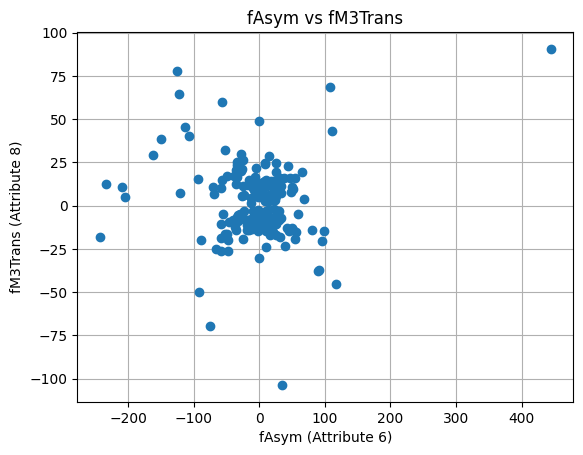

In [15]:
## Plots attribute 6 vs attribute 8 with each point marked as a circle

x1=df['fAsym']
x2=df['fM3Trans']

plt.plot(x1,x2,'o')
plt.xlabel('fAsym (Attribute 6)')
plt.ylabel('fM3Trans (Attribute 8)')
plt.title('fAsym vs fM3Trans')

plt.grid()


---